# Introduction

## Airline Industry
During the period of global pandemic, the aviation and transport industry were harshly affected in terms of revenue generation. This notebook focuses on visualising these patterns of revenue generation and analysing the business insights for aviation industry with OLAP operations.

## Dataset used:
The dataset used is synthesized data for a airlines in a region. 
It contains 4 main data sources namely:

* salesdata - containing information about the date, tickets sold on the date, airline company, routes, number of seats and their revenue generated.
* airlines - information about the airlines, aircrafts, their available classes and seats, daily departure and characteristics of aircrafts
* routes - for each airline, what are the routes and distance between the source and destination in kilometers
* date - rolling up of dates into months, quarters and years

In [1]:
# Import python libraries
import pandas as pd
import datetime

# Import atoti library
import atoti as tt

# Part I - Loading, joining the data and creating cubes

## Load ingredients, contents, price and sales data

In [2]:
# creating a session
session = tt.create_session()

In [3]:
session.link()

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

In [4]:
# loading salesdata
salesdata = pd.read_csv("data/salesdata.csv")
salesdata[["date"]] = salesdata[["date"]].astype('str') 
salesdata_table = session.read_pandas(
    salesdata,
    keys=["dataid"], table_name="salesdata_table"
)
salesdata_table.head()

,date,route id,airlineid,bookings for business class,unit price b,bookings for premium economy class,unit price ec,bookings for economy class,unit price e,total revenue
dataid,,,,,,,,,,
data1,01-05-2020,r001,AA,8,932.00,20,925.00,128,923.00,144100.00
data10,01-06-2020,r003,AA,7,162.80,24,155.80,38,153.80,10723.20
data100,01-07-2020,r017,AA,5,1678.48,32,1671.48,26,1669.48,105286.24
data1000,01-08-2020,r003,G4,1,631.28,43,624.28,35,622.28,49255.12
data1001,01-09-2020,r017,G4,1,1678.48,45,1671.48,37,1669.48,138665.84


In [5]:
# loading airlines dataset to skip the index column and then store it in atoti store

airline_df = pd.read_csv("data/airlines.csv", index_col=0)
airlines_table = session.read_pandas(
    airline_df,
    keys=["airlineid"],
    table_name= 'airlines_table'
)
airlines_table.head()


,Name,seats in business class,seats in economy plus class,seats in economy class,total seats,daily departures,model_number,aircraft_name,weight,Speed,Length(m),Height(m)
airlineid,,,,,,,,,,,,
AA,American (American Airlines),8,24,96,128,12,A319-100,Airbus,"39,000 lb",871 km/h,33.84,11.76
UA,United (United Airlines),36,70,113,219,20,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76
DL,Delta (Delta Air Lines),16,36,108,160,10,757-200,Boeing,"57,160 lb",918 km/hr,47.3,13.6
US,U S Air (US Airways),20,21,206,247,15,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76
AS,Inc. (Alaska Airlines),16,20,141,177,12,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76


In [6]:
# loading routes dataset

routes_table = session.read_csv(
    "data/routes.csv",
    keys=["Route id"]
)
routes_table.head()

1 error(s) occurred while feeding the table Routes. Check the table's loading_report for more details.


,Departure,Destination,distance (km)
Route id,,,


In [9]:
# loading dates dataset
df = pd.read_csv("data/date.csv")
df = df.astype(str)
# df[['year', 'quarter', 'month']] = df[['year', 'quarter', 'month']]. astype(str)
# df[['date']] =  pd.to_datetime(LocalDate)
# df['date'] = pd.to_datetime(df[['date']])

dates_table = session.read_pandas(df,
    keys=["date"], table_name="dates_table"
)
dates_table.head()
# df['date'].dtype


,year,quarter,month
date,,,
01-05-2020,2020,1,1
01-06-2020,2020,1,1
01-07-2020,2020,1,1
01-08-2020,2020,1,1
01-09-2020,2020,1,1


In [10]:
# Now we join the newly created stores to the sales store

salesdata_table.join(airlines_table, mapping={"airlineid": "airlineid"})

salesdata_table.join(routes_table, mapping={"route id": "Route id"})

salesdata_table.join(dates_table, mapping={"date": "date"})

## Creating the cube

In [11]:
cube = session.create_cube(salesdata_table)

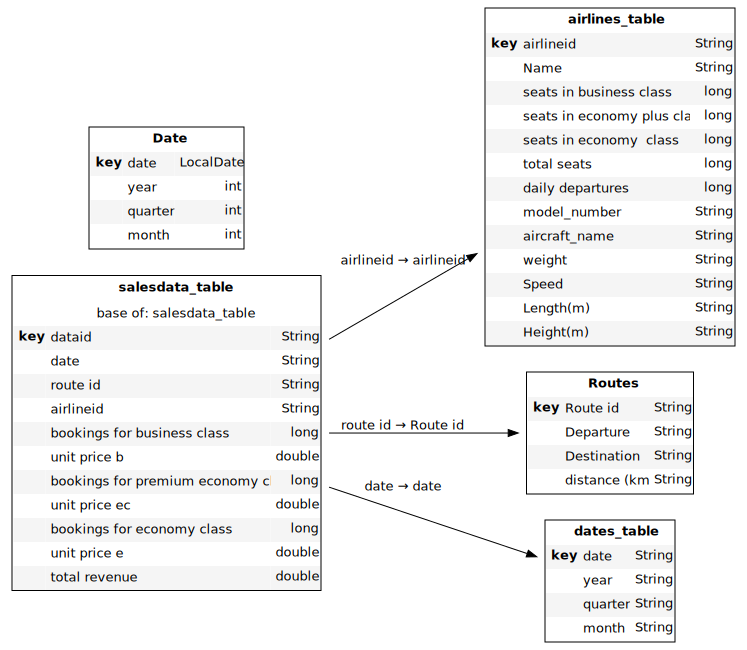

In [12]:
session.tables.schema

In [13]:
# defining measures, level and hierarchy
m = cube.measures
l = cube.levels
h = cube.hierarchies
h

Hierarchies()

# PART II: Visualizations

# 1. Insight

Let's first understand the total revenue generated for aviation industry for the year 2020 and 2021 till date. The negative impact can be easily seen from the slices in the chart.

In [15]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Now let's focus on the year 2020. We will first analyse the distribution of generated revenue according to quarters.

We can see form the graph that the third quarter of the year 2020 had larger impact on aviation industru as compared to other sectors when pandemic was at its peak.

In [16]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

# 2. Insight

Now, we will analyse the airlines for the quarters and their routes.

The graph shows that the Airlines Allegiant Air totally donwfalled in the business in the second half of the year as compared to the first half.

In [17]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Now, we will compare this revenue generated across four quarters for two different airlines across their routes.

We can see that Allegiant Airlines was quite active and engaged in the first two quarters of the year while American Airlines was more busy with the route no. 6 in the third quarter

In [19]:
session.visualize("Allegiant Airlines")



Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [22]:
session.visualize("American Airlines")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Now, let us understand the bookings across the month of MAy, 2020 for different classes for airlines "American Airlines".
We can see that there was very less number of bookings for the airlines as it was the month with highest number of COVID-19 cases across the globe. This impacted the airlines. 

In [21]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Visualizing the info in a dashboard 

The various scenarious and simulations can be simultaneously compared using a dashbard in atoti. 
These dashoboards are highly customisable and can be designed using the various widgets as per the business objective.
These can be saved and shared silpky by sharing a URL.
Click on the link below to explore a sample dashboard we created!!

In [14]:
session.link(path="#/dashboard/fd7")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

## Conclusion:

Such insights from the aviation industry can help the airlines for sales and marketing, exciting offers to attract customers post COVID-19 restrictions in travel, and generate any additional insights that could benefit their business as well their customer services. 

For more interesting notebooks, check out the [atoti gallary](https://github.com/atoti/notebooks)

# _ _The end_ _